# Data Science Essential
- Topic : Analysis of Missing Values
- Category : Data Visualization
- Created By : Maruf Khan
- Linkedln
- GitHub

In [1]:
! pip install missingno


# Importing libraries

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import missingno as msno
import os

# Getting the data

In [3]:
path = os.path.join(r"C:\Users\mk744\OneDrive - Poornima University\Desktop\Feature Scaling\Data Files\house-prices.csv")
df = pd.read_csv(path)
df

,Home,Price,SqFt,Bedrooms,Bathrooms,Offers,Brick,Neighborhood
0,1,114300.0,1790.0,2,2,2,No,East
1,2,114200.0,2030.0,4,2,3,No,East
2,3,114800.0,1740.0,3,2,1,No,East
3,4,94700.0,1980.0,3,2,3,No,East
4,5,119800.0,2130.0,3,3,3,No,East
...,...,...,...,...,...,...,...,...
123,124,NaN,1900.0,3,3,3,Yes,East
124,125,147900.0,2160.0,4,3,3,Yes,East
125,126,113500.0,2070.0,2,2,2,No,North
126,127,149900.0,2020.0,3,3,1,No,West


# Printing the Shape (Rows and Columns)

In [4]:
print("Shape of data", df.shape)
df.head()

Shape of data (128, 8)


,Home,Price,SqFt,Bedrooms,Bathrooms,Offers,Brick,Neighborhood
0,1,114300.0,1790.0,2,2,2,No,East
1,2,114200.0,2030.0,4,2,3,No,East
2,3,114800.0,1740.0,3,2,1,No,East
3,4,94700.0,1980.0,3,2,3,No,East
4,5,119800.0,2130.0,3,3,3,No,East


# Visualizing the Counts or Frequencies

<AxesSubplot:xlabel='Brick', ylabel='count'>

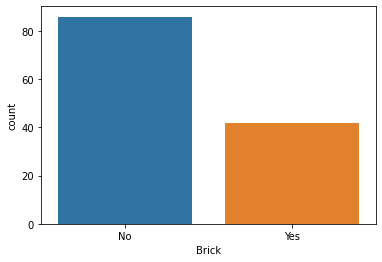

In [5]:
import seaborn as sns
sns.countplot(x = 'Brick', data = df)


<AxesSubplot:xlabel='Neighborhood', ylabel='count'>

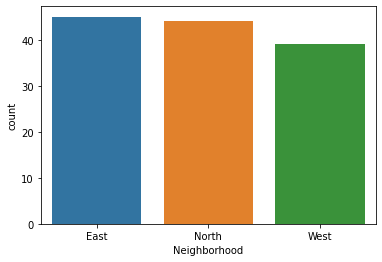

In [6]:
sns.countplot(x = "Neighborhood", data = df)

In [7]:
X = df.drop(columns= "Price")
y = df.Price.copy()
print(X.shape, y.shape)

(128, 7) (128,)


# Matrix
- This will show the rows that has missing values
- In this plot the darker bar shows availability of data
- The lighter rows shows missing data

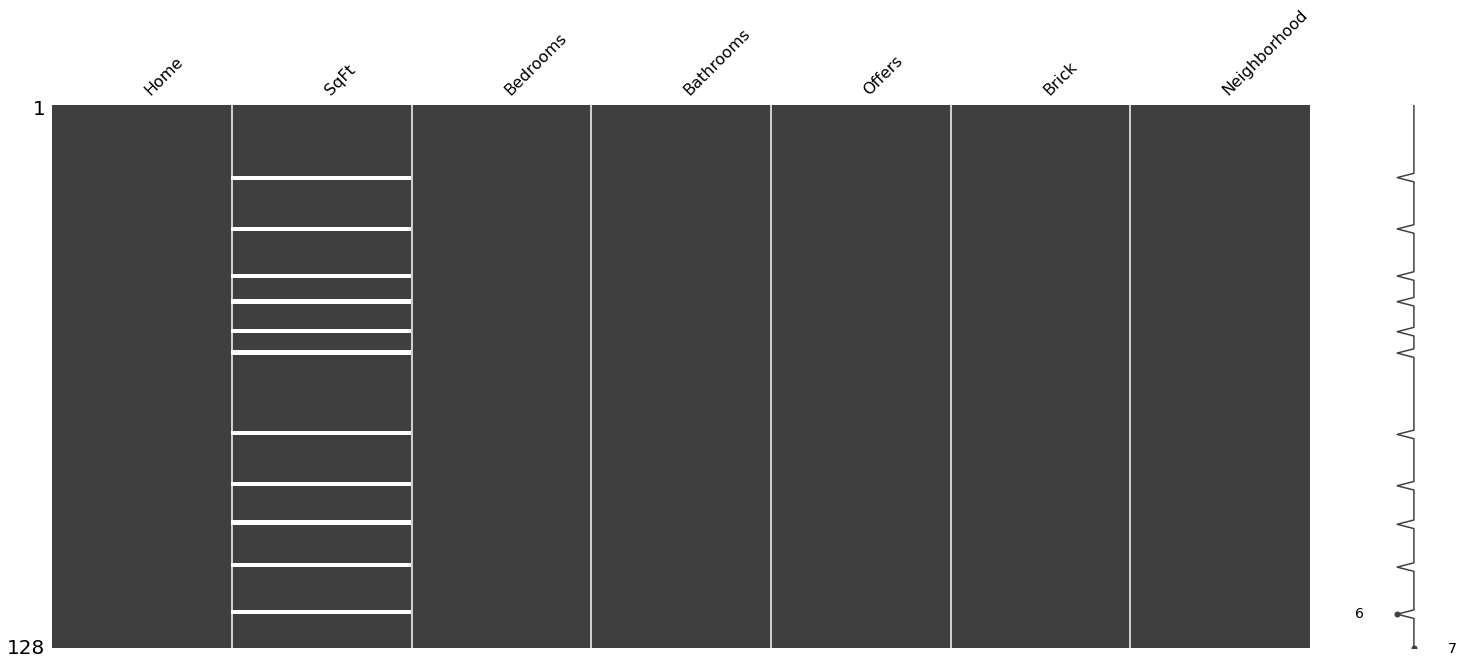

In [8]:
import matplotlib.pyplot as plt
msno.matrix(X)
plt.show()

# Bar Plot
- Length of Bar shows availability of the data
- Shorter Bar shows missing data

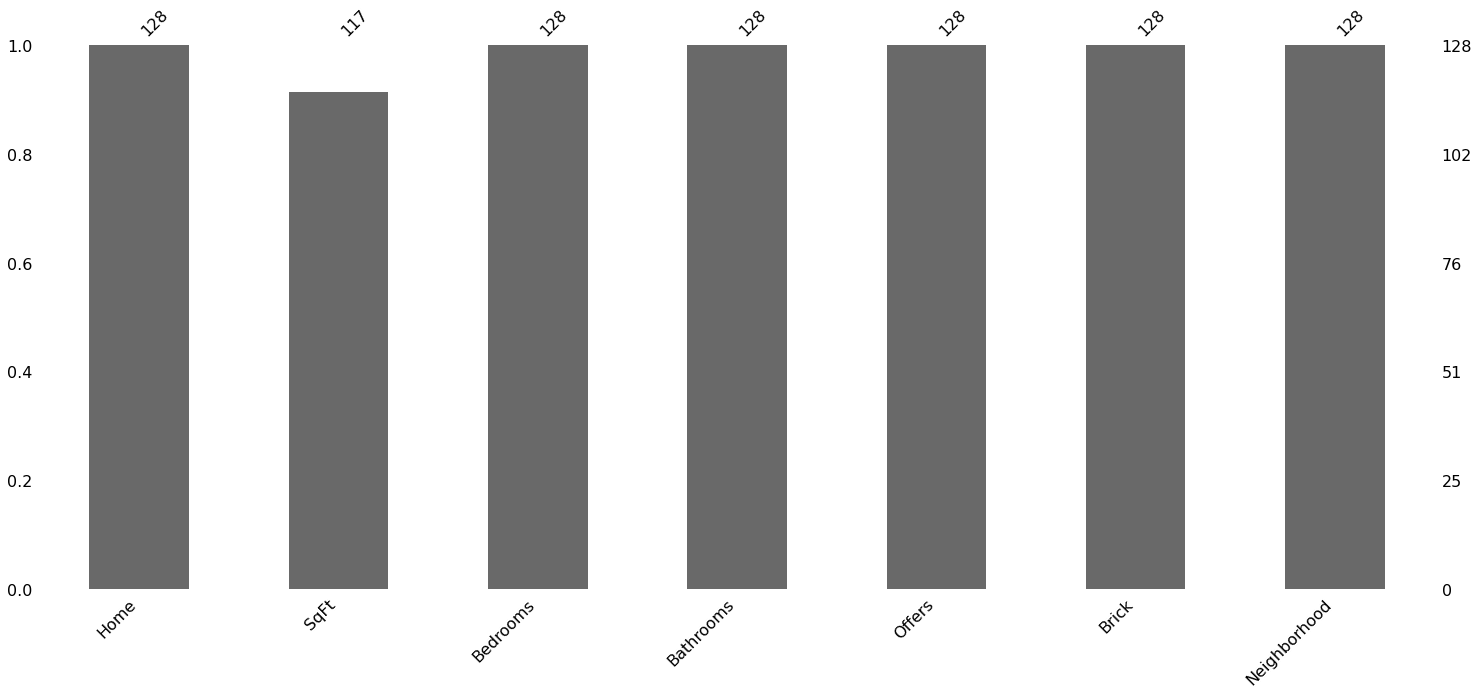

In [9]:
msno.bar(X)
plt.show()


# Custom Function

In [10]:

def missing_info(data):
     """
     Description:
     -----------
     This function will accept a dataframe and return a dataframe describing info about
     The output dataframe will show the count and percentage of missing values in each
     with the feature name as index.
     The percentages are with respect to the total no. of observations in the given da
     Parameters:
     ----------
     data: dataframe
     Input dataframe
     """
     na_cols = [col for col in data.columns if data[col].isna().any()]
     na_frequencies = [data[col].isna().sum() for col in na_cols]
     na_percentages = [data[col].isna().mean() for col in na_cols]
     return (
          pd.
          DataFrame(data={
               "column": na_cols,
               "count": na_frequencies,
               "percentage": na_percentages
          })
          .set_index("column")
          .sort_values("count", ascending=False)
          )

In [11]:
missing_info(X)

,count,percentage
column,,
SqFt,11,0.085938


In [12]:
def plot_missing_info(data,
                      figsize=(6, 4),
                      color="#1745e8",
                      show_bar_labels=True):
     """
     Description:-----------
     This function will accept a dataframe and return a bar plot showing the cou
     in each feature in descending order.
     Parameters:----------
     data: dataframe
          Input dataframe
     figsize = tuple -> (width, height)
               The dimensions of the bar plot figure
     color = str
          Color to use for the bars. Any valid color string will be accepted.
     show_bar_labels: bool
                    Whether to display the count of missing values for each fe
     """
     fig, ax = plt.subplots(figsize=figsize)
     bar =(
     missing_info(data)
     .loc[:, "count"]
     .plot
     .bar(
          color=color,
          
           ax=ax,
        alpha=0.7,
        edgecolor="black"
     )
     )
     ax.set_xlabel("Feature", fontweight="bold", fontsize=11)
     ax.set_ylabel("Count", fontweight="bold", fontsize=11)
     ax.set_title("Missing Values Counts for each Feature", fontweight="bold", fontsize = 15)
     ax.set_xticklabels(
     ax.get_xticklabels(),
     rotation=45,
     ha="right"
     )
     if show_bar_labels:
          containers = bar.containers[0]
          labels = [f"{count:,}" for count in containers.datavalues]
          ax.bar_label(
          containers,
          labels=labels,
          padding=2
     )
     plt.show()

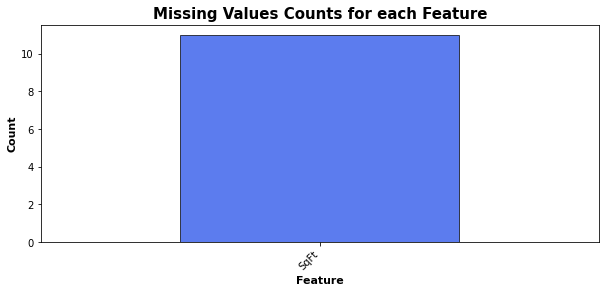

In [13]:
plot_missing_info(
 X,
 figsize=(10, 4),
 show_bar_labels=False
 )

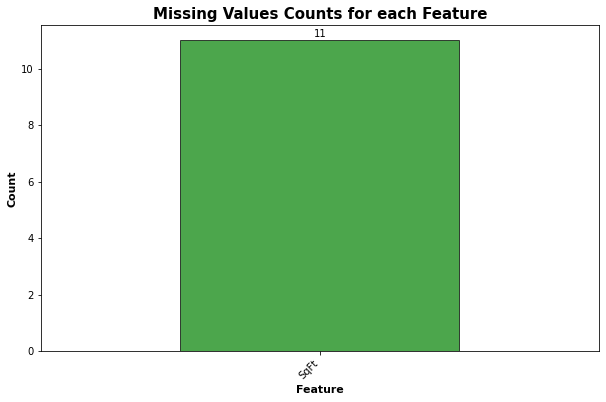

In [14]:

plot_missing_info(
 X,
 figsize=(10, 6),
 color="green",
 show_bar_labels=True
 )